# Assignment 1

### Question 0: Data Preparation

In [13]:
! pip install pyreadstat

In [39]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import statsmodels.api as sm

In [15]:
df = pd.read_csv("data.csv", sep=';')
df.tail()
df.head()

,Review_ID,Number_Words_Review,ZNumber_Words_Review,Prod_Desig,Prod_Design_positive,Prod_Design_negative,Prod_Technical,Prod_Technical_positive,Prod_Technical_negative,Prod_Price,...,Serv_Delivery_positive,Serv_Delivery_negative,Category,Country,Gender,Age,Sentiment,Rating_Score,Purchase,Number_of_Purchases
0,1,34,"-0,178828858",1,1,0,1,1,0,0,...,0,0,0,1,0,"24,56327497",4,5,1,1
1,2,32,"-0,225796385",1,1,0,1,1,0,1,...,0,0,0,1,0,"38,27120469",5,4,0,0
2,3,54,"0,290846409",1,0,1,1,0,1,1,...,0,1,0,1,0,"46,77239881",2,2,0,0
3,4,20,"-0,507601545",1,1,0,1,1,0,0,...,0,0,0,1,0,"31,66539161",5,5,1,2
4,5,12,"-0,695471652",1,1,0,1,1,0,0,...,0,0,0,1,0,"25,31939178",3,5,0,0


### Convert 'object' columns to 'float'

In [16]:
df['ZNumber_Words_Review'] = df['ZNumber_Words_Review'].astype(str).str.replace(',', '.').astype(float)
df['Age'] = df['Age'].astype(str).str.replace(',', '.').astype(float)
# Check if the conversion was successful
df[['ZNumber_Words_Review', 'Age']].info(), df[['ZNumber_Words_Review', 'Age']].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ZNumber_Words_Review  600 non-null    float64
 1   Age                   600 non-null    float64
dtypes: float64(2)
memory usage: 9.5 KB


(None,
    ZNumber_Words_Review        Age
 0             -0.178829  24.563275
 1             -0.225796  38.271205
 2              0.290846  46.772399
 3             -0.507602  31.665392
 4             -0.695472  25.319392)

### Fix 'Category' column

In [17]:
category_dummies = pd.get_dummies(df['Category'], prefix='Category')
category_dummies = category_dummies.astype(int)
df = df.drop('Category', axis=1)
df = df.join(category_dummies)
df.head()

,Review_ID,Number_Words_Review,ZNumber_Words_Review,Prod_Desig,Prod_Design_positive,Prod_Design_negative,Prod_Technical,Prod_Technical_positive,Prod_Technical_negative,Prod_Price,...,Country,Gender,Age,Sentiment,Rating_Score,Purchase,Number_of_Purchases,Category_0,Category_1,Category_2
0,1,34,-0.178829,1,1,0,1,1,0,0,...,1,0,24.563275,4,5,1,1,1,0,0
1,2,32,-0.225796,1,1,0,1,1,0,1,...,1,0,38.271205,5,4,0,0,1,0,0
2,3,54,0.290846,1,0,1,1,0,1,1,...,1,0,46.772399,2,2,0,0,1,0,0
3,4,20,-0.507602,1,1,0,1,1,0,0,...,1,0,31.665392,5,5,1,2,1,0,0
4,5,12,-0.695472,1,1,0,1,1,0,0,...,1,0,25.319392,3,5,0,0,1,0,0


## Question 1: Linear Regression

Given the nature of the question, a regression model seems appropriate as we are interested in understanding how various factors influence the continuous outcome of rating scores.

In [49]:
target_reg = 'Rating_Score'
X_reg = df.drop(['Review_ID', target_reg], axis=1)
y_reg = df[target_reg]

For this analysis, I will build a linear regression model to predict Rating_Score using the explanatory variables provided. This model will help us understand which factors are significant in explaining the variation in rating scores and the direction of their impact.

In [50]:
X_reg = sm.add_constant(X_reg)
model = sm.OLS(y_reg, X_reg).fit()
predictions = model.predict(X_reg)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           Rating_Score   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     69.56
Date:                Wed, 20 Mar 2024   Prob (F-statistic):          2.19e-139
Time:                        13:42:11   Log-Likelihood:                -612.33
No. Observations:                 600   AIC:                             1267.
Df Residuals:                     579   BIC:                             1359.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

Results: 
- Sentiment Score: This has a significant positive impact on rating scores. A higher sentiment score is associated with higher rating scores.
- Product Technical Features: Mentioning technical features (both positively and negatively) has a significant effect. In particular, positive mentions of technical features strongly increase rating scores, while the mere mention of technical features (regardless of sentiment) seems to decrease them.
- Service Delivery: Negative mentions of delivery have a significant negative impact on rating scores

Marketing Implications:

- Focusing on improving customer sentiment about products can lead to higher rating scores. Strategies to enhance positive experiences and minimize negative ones are crucial.
- Emphasizing the technical features of products in marketing and communication strategies seems beneficial, especially highlighting the positive aspects.
- Efficient and satisfactory delivery services can significantly influence customer ratings. Efforts to improve delivery experiences should be prioritized.

## Question 2: Logistic Regression

In [64]:
target_log = 'Purchase'
X_log = df.drop(['Review_ID', 'Number_of_Purchases', target_log], axis=1)
y_log = df[target_log]

In [65]:
# Create the Logistic model
logistic_model = sm.Logit(y_log, X_log).fit()

# Model summary
logistic_model_summary = logistic_model.summary()
logistic_model_summary

         Current function value: 0.152650
         Iterations: 35


d:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Purchase   No. Observations:                  600
Model:                          Logit   Df Residuals:                      579
Method:                           MLE   Df Model:                           20
Date:                Wed, 20 Mar 2024   Pseudo R-squ.:                  0.5079
Time:                        14:16:59   Log-Likelihood:                -91.590
converged:                      False   LL-Null:                       -186.11
Covariance Type:            nonrobust   LLR p-value:                 1.635e-29
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Number_Words_Review        -0.2846   1.35e+05   -2.1e-06      1.000   -2.65e+05    2.65e+05
ZNumber_Words_Review       12.3810   5.77e+06   2.15e-06      1.000   -1.13e+07    1.13e+07
Prod_Desig                  3.6760      1.058      3.475      0.001       1.603       5.749
Prod_Design_positive       -2.0715      0.924     -2.241      0.025      -3.883      -0.260
Prod_Design_negative       -1.4200      0.660     -2.152      0.031      -2.713      -0.127
Prod_Technical             -2.4121      1.547     -1.559      0.119      -5.445       0.621
Prod_Technical_positive     2.3159      1.459      1.588      0.112      -0.543       5.175
Prod_Technical_negative     1.6577      0.630      2.631      0.009       0.423       2.893
Prod_Price                  0.8849   2.71e+07   3.26e-08      1.000   -5.32e+07    5.32e+07
Prod_Price_positive        -0.2404   2.73e+07  -8.81e-09      1.000   -5.35e+07    5.35e+07
Prod_Price_negative         1.1253   2.72e+07   4.14e-08      1.000   -5.33e+07    5.33e+07
Serv_Delivery              -6.4529   3.83e+07  -1.68e-07      1.000   -7.51e+07    7.51e+07
Serv_Delivery_positive      5.3533   3.83e+07    1.4e-07      1.000   -7.51e+07    7.51e+07
Serv_Delivery_negative    -11.8062   3.83e+07  -3.08e-07      1.000    -7.5e+07     7.5e+07
Country                     1.6813      0.441      3.813      0.000       0.817       2.545
Gender                      0.4076      0.385      1.059      0.290      -0.347       1.162
Age                         0.0020      0.014      0.147      0.883      -0.025       0.029
Sentiment                   0.8651      0.336      2.576      0.010       0.207       1.523
Rating_Score                0.7134      0.486      1.468      0.142      -0.239       1.666
Category_0                 -3.2533   5.64e+06  -5.77e-07      1.000    -1.1e+07     1.1e+07
Category_1                 -4.1888   5.64e+06  -7.43e-07      1.000    -1.1e+07     1.1e+07
Category_2                 -4.7079   5.64e+06  -8.35e-07      1.000    -1.1e+07     1.1e+07
Purchase_Occurrence         5.2441      1.056      4.967      0.000       3.175       7.313
===========================================================================================

Possibly complete quasi-separation: A fraction 0.18 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Key Findings:

- Sentiment Score: A significant positive predictor, indicating that higher sentiment scores increase the likelihood of a purchase.
- Product Design: Mentioning design in reviews significantly increases the likelihood of purchase, plus both negative and positive aspects of design are a significant predictors.
- Product Technical Features: No significant effect was found, except for negative Technical reviews: in which it is interesting to notice that negative Technical reviews have a stastically significant positive effect of purchase probability 
- Service Delivery: This variable and its subcategories have problematic estimates (possibly due to collinearity or data issues).
- Country: This demographic factor significantly affect purchase likelihood

Marketing Implications:

- Enhancing customer sentiment through quality products and services can increase the likelihood of purchase.
- Emphasis on design in marketing and product development could be beneficial, as design mentions in reviews correlate with purchase decisions.
- Attention to demographic factors like country and product category can help tailor marketing strategies effectively.

## Question 3

Given that the dependent variable, the number of total purchases, is a count data, a Poisson regression or a Negative Binomial regression model could be appropriate

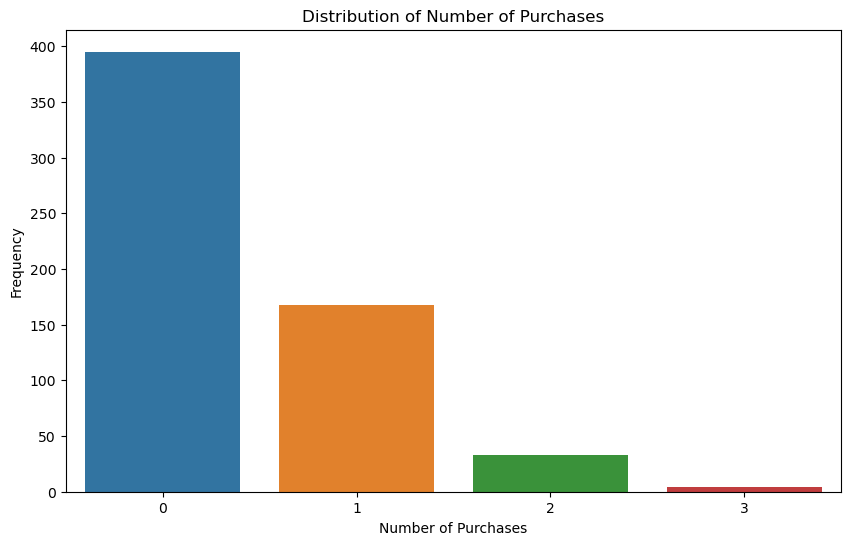

count    600.000000
mean       0.410000
std        0.626542
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: Number_of_Purchases, dtype: float64

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of Number_of_Purchases
plt.figure(figsize=(10, 6))
sns.countplot(data = df, x = 'Number_of_Purchases')
plt.title('Distribution of Number of Purchases')
plt.xlabel('Number of Purchases')
plt.ylabel('Frequency')
plt.show()

# Summary statistics for Number_of_Purchases
df['Number_of_Purchases'].describe()

In [38]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Preparing data for Poisson regression
X_poisson = df.drop(['Review_ID', 'Number_of_Purchases'], axis=1)
y_poisson = df['Number_of_Purchases']

# Adding a constant to the model (for intercept)
X_poisson = sm.add_constant(X_poisson)

# Building the Poisson regression model
poisson_model = sm.GLM(y_poisson, X_poisson, family=sm.families.Poisson()).fit()

# Model summary
poisson_model_summary = poisson_model.summary()
poisson_model_summary



<class 'statsmodels.iolib.summary.Summary'>
"""
                  Generalized Linear Model Regression Results                  
===============================================================================
Dep. Variable:     Number_of_Purchases   No. Observations:                  600
Model:                             GLM   Df Residuals:                      579
Model Family:                  Poisson   Df Model:                           20
Link Function:                     Log   Scale:                          1.0000
Method:                           IRLS   Log-Likelihood:                -454.04
Date:                 Wed, 20 Mar 2024   Deviance:                       473.86
Time:                         12:37:28   Pearson chi2:                     568.
No. Iterations:                     12   Pseudo R-squ. (CS):             0.1287
Covariance Type:             nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    3.507e+07   1.67e+08      0.210      0.833   -2.92e+08    3.62e+08
Number_Words_Review     -1.124e+06   5.34e+06     -0.210      0.833   -1.16e+07    9.35e+06
ZNumber_Words_Review     4.785e+07   2.27e+08      0.210      0.833   -3.98e+08    4.94e+08
Prod_Desig                 -0.4397      0.297     -1.482      0.138      -1.021       0.142
Prod_Design_positive        0.0767      0.264      0.290      0.772      -0.441       0.595
Prod_Design_negative        0.0796      0.210      0.379      0.705      -0.332       0.491
Prod_Technical             -0.2694      0.393     -0.685      0.493      -1.040       0.501
Prod_Technical_positive     0.3680      0.370      0.994      0.320      -0.358       1.094
Prod_Technical_negative    -0.1306      0.212     -0.616      0.538      -0.546       0.285
Prod_Price                  0.0023      0.236      0.010      0.992      -0.460       0.465
Prod_Price_positive        -0.2165      0.255     -0.848      0.396      -0.717       0.284
Prod_Price_negative         0.1019      0.285      0.358      0.721      -0.456       0.660
Serv_Delivery               0.9727      4.946      0.197      0.844      -8.721      10.667
Serv_Delivery_positive     -0.6979      4.965     -0.141      0.888     -10.429       9.033
Serv_Delivery_negative     -1.4493      4.963     -0.292      0.770     -11.176       8.277
Country                    -0.0949      0.145     -0.655      0.512      -0.379       0.189
Gender                     -0.0941      0.132     -0.712      0.476      -0.353       0.165
Age                        -0.0056      0.005     -1.187      0.235      -0.015       0.004
Sentiment                   0.1271      0.096      1.323      0.186      -0.061       0.315
Rating_Score               -0.0528      0.109     -0.486      0.627      -0.266       0.160
Purchase                    1.2221      0.165      7.416      0.000       0.899       1.545
Category_0               1.169e+07   5.56e+07      0.210      0.833   -9.72e+07    1.21e+08
Category_1               1.169e+07   5.56e+07      0.210      0.833   -9.72e+07    1.21e+08
Category_2               1.169e+07   5.56e+07      0.210      0.833   -9.72e+07    1.21e+08
===========================================================================================
"""

Interpretation and Marketing Implications:

- There is a significant efffect of 'Purchase' on the number of purchases 
- The lack of significance in other variables could suggest that factors not captured in the dataset might be influencing purchase behavior.

## Question 4

In [ ]:
df['Sentiment_Category_Interaction'] = df['Sentiment'] * df['Category']
X_interaction = sm.add_constant(df[predictors + ['Sentiment_Category_Interaction']])
y = data['Rating_Score']
